In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("complete_cleaned_data CSV.csv")

In [3]:
df = df.sample(frac=1)

In [4]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [5]:
print(df.iloc[203])

Label                                    0
Text     asthma inhalers anabolic steroids
Name: 202, dtype: object


#Train test Split

In [91]:
X = df['Text']
y = df['Label']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [365]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(617,)
(617,)
(155,)
(155,)


#Count vectorizer

In [366]:
#Convert trainig text to document term matrix
vectorizer  = CountVectorizer()
vectorizer.fit(X_train)
train_dtm = vectorizer.transform(X_train)

In [367]:
#Transform testing data into document term matrix using fitted vocabulary
test_dtm = vectorizer.transform(X_test)

In [368]:
#train dataframe
train_dtm_df = pd.DataFrame(train_dtm.toarray(), columns = vectorizer.get_feature_names_out())
train_dtm_df

aasche  abdominal  aber  ability  able  about  above  absolutely  \
0         0          0     0        0     0      0      0           0   
1         0          0     0        0     0      1      0           0   
2         0          0     0        0     0      0      0           0   
3         0          0     0        0     0      0      0           0   
4         0          0     0        0     0      0      0           0   
..      ...        ...   ...      ...   ...    ...    ...         ...   
612       0          0     0        0     0      0      0           0   
613       0          0     0        0     0      0      0           0   
614       0          0     0        0     0      0      0           0   
615       0          0     0        0     0      0      0           0   
616       0          0     0        0     0      0      0           0   

     absorption  academy  ...  york  young  younger  yourself  youtube  \
0             0        0  ...     0      0        0         0        0   
1             0        0  ...     0      0        0         0        0   
2             0        0  ...     0      0        0         0        0   
3             0        0  ...     0      0        0         0        0   
4             0        0  ...     0      0        0         0        0   
..          ...      ...  ...   ...    ...      ...       ...      ...   
612           0        0  ...     0      0        0         0        0   
613           0        0  ...     0      0        0         0        0   
614           0        0  ...     0      0        0         0        0   
615           0        0  ...     0      0        0         0        0   
616           0        0  ...     0      0        0         0        0   

     zealand  zeeuw  zelensky  zero  zimbabwe  
0          0      0         0     0         0  
1          0      0         0     0         0  
2          0      0         0     0         0  
3          0      0         0     0         0  
4          0      0         0     0         0  
..       ...    ...       ...   ...       ...  
612        0      0         0     0         0  
613        0      0         0     0         0  
614        0      0         0     0         0  
615        0      0         0     0         0  
616        0      0         0     0         0  

[617 rows x 3475 columns]

In [369]:
#test Dataframe
test_dtm_df = pd.DataFrame(test_dtm.toarray(), columns = vectorizer.get_feature_names_out())
test_dtm_df

aasche  abdominal  aber  ability  able  about  above  absolutely  \
0         0          0     0        0     0      0      0           0   
1         0          0     0        0     0      0      0           0   
2         0          0     0        0     0      0      0           0   
3         0          0     0        0     0      0      0           0   
4         0          0     0        0     0      0      0           0   
..      ...        ...   ...      ...   ...    ...    ...         ...   
150       0          0     0        0     0      0      0           0   
151       0          0     0        0     0      0      0           0   
152       0          0     0        0     0      0      0           0   
153       0          0     0        0     0      0      0           0   
154       0          0     0        0     0      0      0           0   

     absorption  academy  ...  york  young  younger  yourself  youtube  \
0             0        0  ...     0      0        0         0        0   
1             0        0  ...     0      0        0         0        0   
2             0        0  ...     0      0        0         0        0   
3             0        0  ...     0      0        0         0        0   
4             0        0  ...     0      0        0         0        0   
..          ...      ...  ...   ...    ...      ...       ...      ...   
150           0        0  ...     0      0        0         0        0   
151           0        0  ...     0      0        0         0        0   
152           0        0  ...     0      0        0         0        0   
153           0        0  ...     0      0        0         0        0   
154           0        0  ...     0      0        0         0        0   

     zealand  zeeuw  zelensky  zero  zimbabwe  
0          0      0         0     0         0  
1          1      0         0     0         0  
2          0      0         0     0         0  
3          0      0         0     0         0  
4          0      0         0     0         0  
..       ...    ...       ...   ...       ...  
150        0      0         0     0         0  
151        0      0         0     0         0  
152        0      0         0     0         0  
153        0      0         0     0         0  
154        0      0         0     0         0  

[155 rows x 3475 columns]

#Multinomial Naive Bayes

In [370]:
nb = MultinomialNB()
nb.fit(train_dtm,y_train)

MultinomialNB()

In [371]:
y_pred = nb.predict(test_dtm)

In [372]:
acc_nb = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy :", np.round(acc_nb*100,2),"%")

Model Accuracy : 79.35 %


In [119]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)

In [120]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm1 = pd.DataFrame(cm1,
                     index = ['fitness','Anabolic Steroids','Supplements','Nutrition'], 
                     columns = ['fitness','Anabolic Steroids','Supplements','Nutrition'])

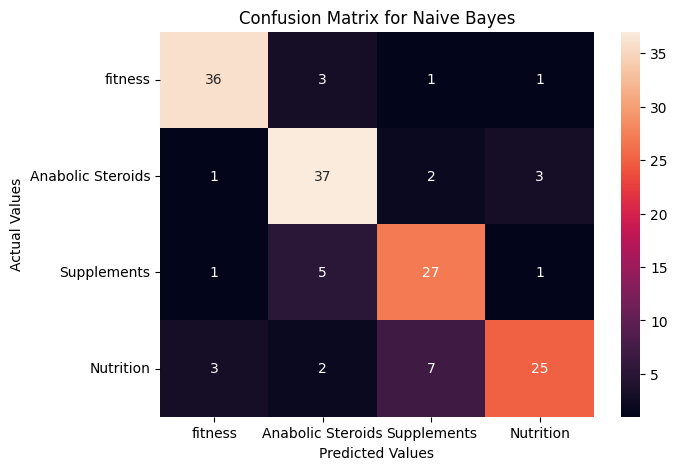

In [ ]:
#Plotting the matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm1, annot=True, fmt='g')
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Decision Tress

In [644]:
tree1 = tree.DecisionTreeClassifier()
tree1.fit(train_dtm, y_train)


Model Accuracy: 75.48 %


In [274]:
y_pred_1 = tree1.predict(test_dtm)

In [275]:
acc_tree = metrics.accuracy_score(y_test, y_pred_1)

In [276]:
print("Model Accuracy:", np.round(acc_tree*100, 2), "%")

Model Accuracy: 75.48 %


In [645]:
#Confusion Matrix
cm2 = confusion_matrix(y_test,y_pred_1)

In [646]:
#Converting to Dataframe
cm2 = pd.DataFrame(cm2, 
                   index = ['Fitness','Anabolic Steroids','Supplements','Nutrition'],
                   columns =['Fitness','Anabolic Steroids','Supplements','Nutrition'] )

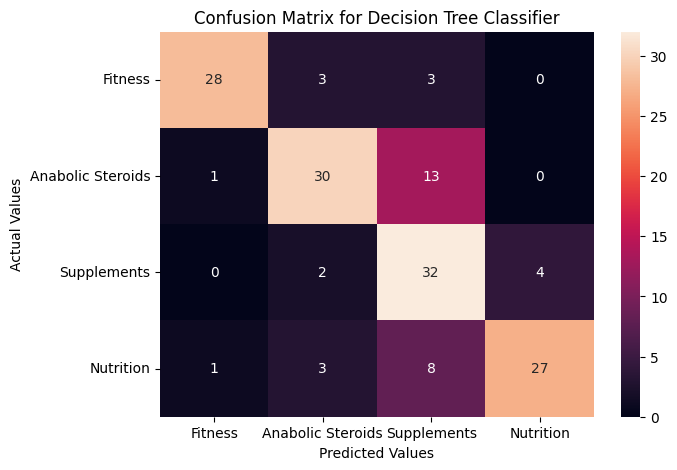

In [647]:
#Plotting
plt.figure(figsize=(7,5))
sns.heatmap(cm2, annot =True, fmt = 'g')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
#Plotting Tree1
dot_data=tree.export_graphviz(tree1, out_file=None,filled=True) #filled = it will fill colors as per the conditon for the target variable = collection
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
tree2 = tree.DecisionTreeClassifier(max_depth = 5)
tree2.fit(train_dtm, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_2 = tree2.predict(test_dtm)

In [ ]:
acc_tree2 = metrics.accuracy_score(y_test, y_pred_2)
print("Model Accuracy:", np.round(acc_tree2*100, 2), "%")

Model Accuracy: 71.61 %


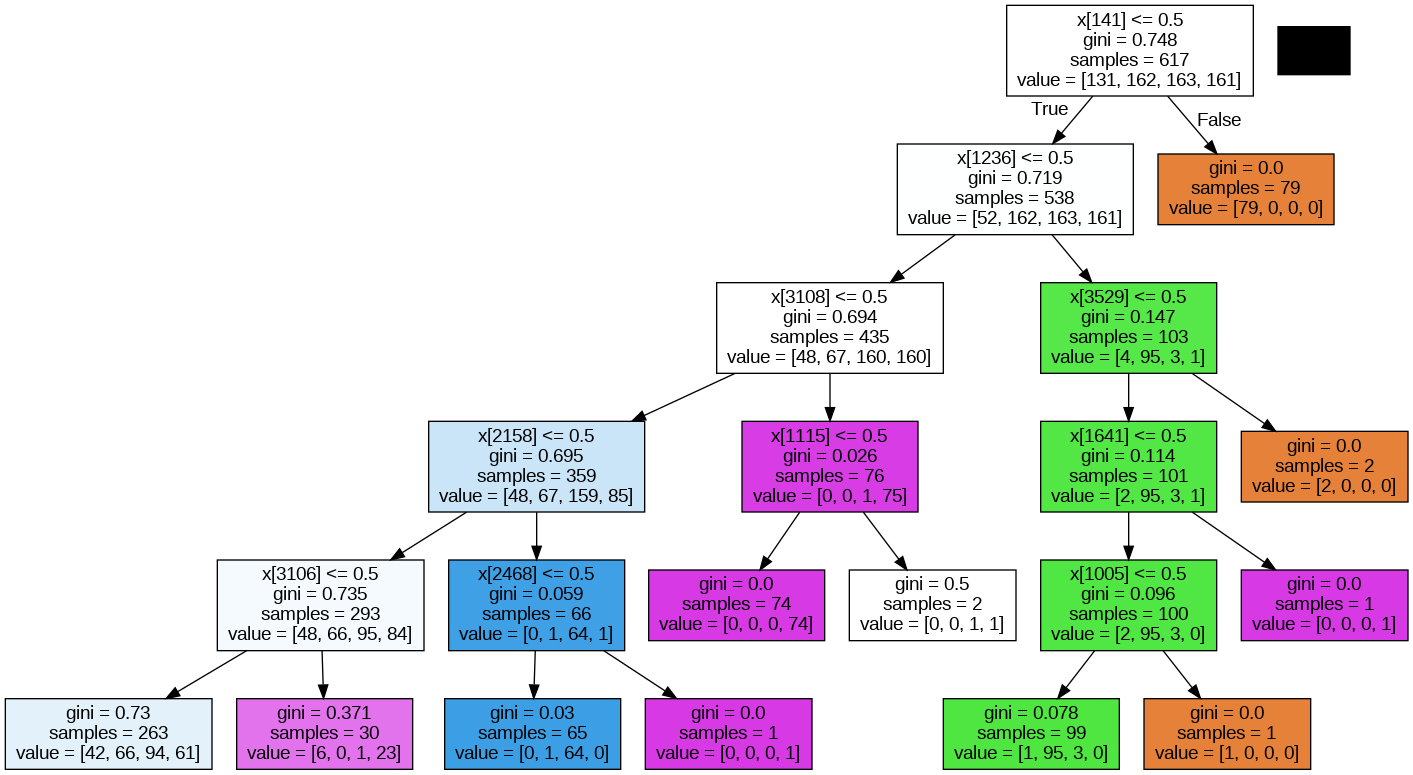

In [ ]:
#Plotting Tree2 
dot_data1=tree.export_graphviz(tree2, out_file=None,filled=True) #filled = it will fill colors as per the conditon for the target variable = collection
graph2=pydotplus.graph_from_dot_data(dot_data1)
Image(graph2.create_png())

In [ ]:
tree3 = tree.DecisionTreeClassifier(max_depth = 3)
tree3.fit(train_dtm, y_train)
y_pred_3 = tree3.predict(test_dtm)
acc_tree3 = metrics.accuracy_score(y_test, y_pred_3)
print("Model Accuracy:", np.round(acc_tree3*100, 2), "%")

Model Accuracy: 69.03 %


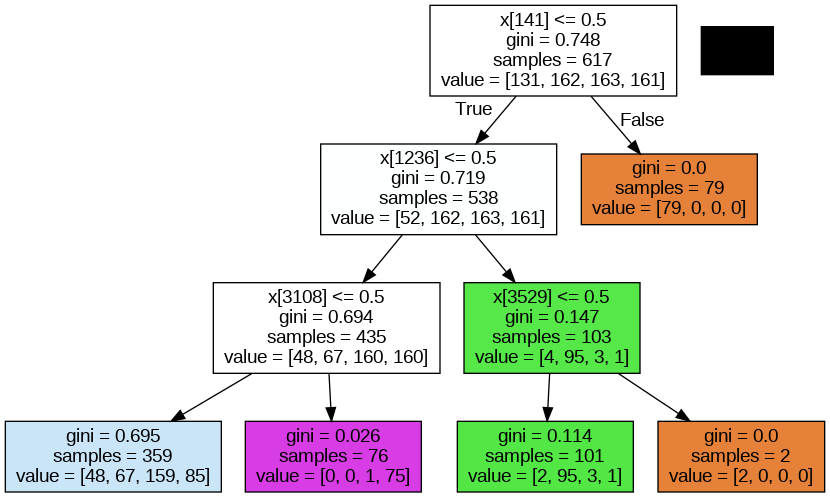

In [ ]:
#Plotting Tree 3
dot_data3=tree.export_graphviz(tree3, out_file=None,filled=True) #filled = it will fill colors as per the conditon for the target variable = collection
graph2=pydotplus.graph_from_dot_data(dot_data3)
Image(graph2.create_png())

#PCA

###For SVM Viz

In [ ]:
# convert training data
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(train_dtm_df)
print(len(x_train_pca))

617


In [ ]:
train_pca_df = pd.DataFrame(x_train_pca.tolist())
#set Index of y train to reduced datafram
train_pca_df.index = y_train.index
train_pca_df.rename(columns={0: 'Feature 1', 1 : 'Feature 2'}, inplace = True)

In [ ]:
train_pca_df

Feature 1  Feature 2
23   -0.034314  -0.090677
552  -0.159813  -0.008422
330  -0.112743  -0.370729
302  -0.176578   0.077857
450  -0.084039  -0.349554
..         ...        ...
276   1.155198   0.166679
507  -0.157163  -0.285666
239   1.270319   0.077735
750  -0.245765  -0.152275
548  -0.037982  -0.201610

[617 rows x 2 columns]

In [ ]:
#Convert Text Data
x_test_pca = pca.fit_transform(test_dtm_df)
print(len(x_test_pca))

155


In [ ]:
test_pca_df = pd.DataFrame(x_test_pca.tolist())
#Set Index
test_pca_df.index = y_test.index
test_pca_df.rename(columns={0 :"Feature 1",1:"Feature 2"}, inplace = True)

#Support Vector Machine

In [ ]:
# Linear Kernel
suppl = SVC(kernel = "linear")
suppl.fit(train_dtm, y_train)
y2_predl = suppl.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_predl)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 80.0 %


In [ ]:
#Confusion Matrix for linear Kernel
cml = confusion_matrix(y2_predl,y_test)
cml_df = pd.DataFrame(cml, 
                   index = ['Fitness','Anabolic Steroids','Supplements','Nutrition'],
                   columns =['Fitness','Anabolic Steroids','Supplements','Nutrition'] )

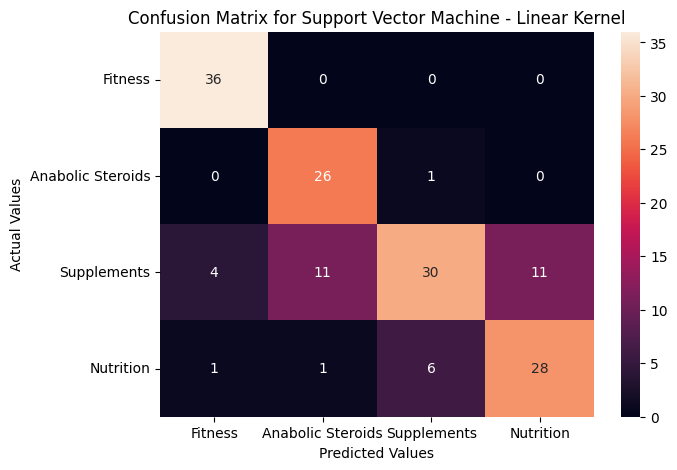

In [ ]:
plt.figure(figsize =(7,5))
sns.heatmap(cml_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - Linear Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
# Sigmoid Kernel
supps = SVC(kernel = "sigmoid")
supps.fit(train_dtm, y_train)
y2_preds = supps.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_preds)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 79.35 %


In [ ]:
#Confusion Matrix for Sigmoid Kernel
cms = confusion_matrix(y2_preds,y_test)
cms_df = pd.DataFrame(cms, 
                   index = ['Fitness','Anabolic Steroids','Supplements','Nutrition'],
                   columns =['Fitness','Anabolic Steroids','Supplements','Nutrition'] )

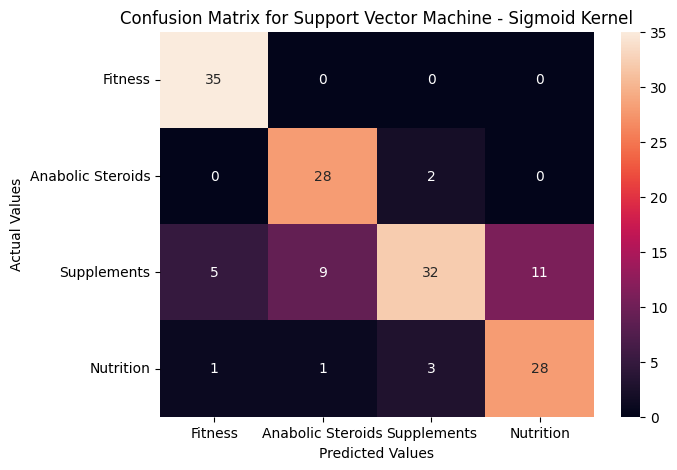

In [ ]:
plt.figure(figsize =(7,5))
sns.heatmap(cms_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - Sigmoid Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
# RBF  Kernel
suppr = SVC(kernel = "rbf")
suppr.fit(train_dtm, y_train)
y2_predr = suppr.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_predr)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 77.42 %


In [ ]:
#Confusion Matrix for rbf Kernel
cmr = confusion_matrix(y2_predr,y_test)
cmr_df = pd.DataFrame(cmr, 
                   index = ['Fitness','Anabolic Steroids','Supplements','Nutrition'],
                   columns =['Fitness','Anabolic Steroids','Supplements','Nutrition'] )

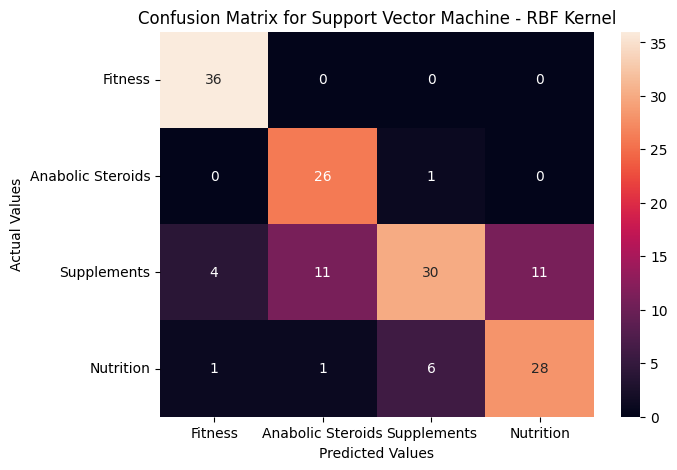

In [ ]:
plt.figure(figsize =(7,5))
sns.heatmap(cmr_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - RBF Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

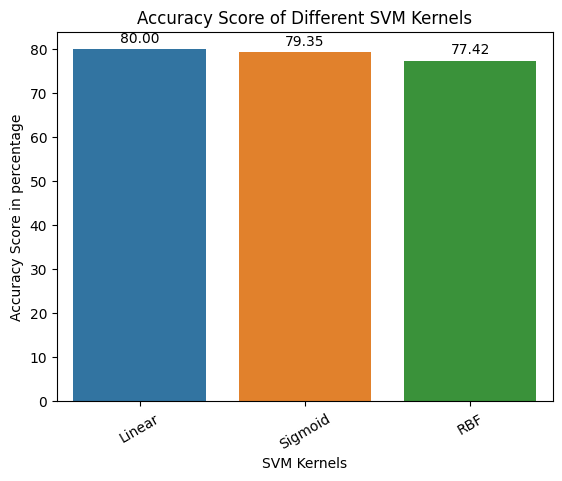

In [ ]:
#SVM Vizualization - Comparing three Kernels
data = {"Kernels": ["Linear", "Sigmoid", "RBF"],
        "Accuracy": [80,79.35, 77.42]}
svm_df = pd.DataFrame(data, columns = ['Kernels','Accuracy'])
plots = sns.barplot(x="Kernels", y="Accuracy", data=svm_df)
# Text above bars
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
#free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Accuracy Score of Different SVM Kernels")
plt.xlabel("SVM Kernels")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Accuracy Score in percentage")
plt.show()


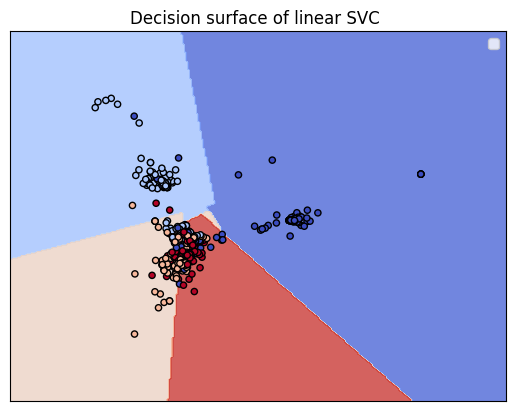

In [ ]:
#SVM Viz for 2 Features
X = x_train_pca  # we only take the first two features.
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

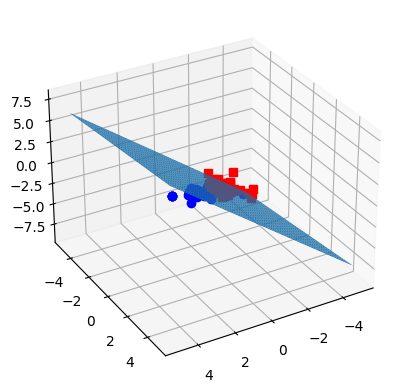

In [ ]:
# 3-D SVM viz for 3 features
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = x_train_pca
Y = y_train

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()